# [scipy.sparse.csgraph](https://docs.scipy.org/doc/scipy/reference/sparse.csgraph.html)

In [23]:
import numpy as np

In [24]:
def print_dist_prev(dist,prev,s):
    for i in range(len(dist)):
        if i!=s:
            print('%d|%2d|%d'%(i,dist[i],prev[i]))

# 导入数据

In [25]:
e = np.array([[0, 1, 10], [1, 0, 10],
         [0, 4, 100], [4, 0, 100],
         [1, 2, 50], [2, 1, 50],
         [4, 3, 60], [3, 4, 60],
         [2, 3, 20], [3, 2, 20],
         [0, 3, 30], [3, 0, 30],
         [2, 4, 10], [4, 2, 10]])
e2=np.array([[0, 1, 6], [0, 2, 7],
             [1, 3, 5], [3, 1, -2],
             [1, 2, 8], [1, 4, -4],
             [2, 3, -3], [2, 4, 9],
             [4, 3, 7], [4, 0, 2]])

# 输入图的数据结构转换

In [26]:
from scipy.sparse import csr_matrix,coo_matrix

In [27]:
e_mat=coo_matrix((e[:,2],(e[:,0],e[:,1]))).toarray()
print(e_mat)

[[  0  10   0  30 100]
 [ 10   0  50   0   0]
 [  0  50   0  20  10]
 [ 30   0  20   0  60]
 [100   0  10  60   0]]


In [28]:
e_dns=csr_matrix(e_mat)
print(e_dns)

  (0, 1)	10
  (0, 3)	30
  (0, 4)	100
  (1, 0)	10
  (1, 2)	50
  (2, 1)	50
  (2, 3)	20
  (2, 4)	10
  (3, 0)	30
  (3, 2)	20
  (3, 4)	60
  (4, 0)	100
  (4, 2)	10
  (4, 3)	60


# 通用最短路径算法

In [29]:
from scipy.sparse.csgraph import shortest_path
s=0
dist,prev=shortest_path(csgraph=e_dns,method='D',directed=True,indices=s,return_predecessors=True)
print_dist_prev(dist,prev,s)

1|10|0
2|50|3
3|30|0
4|60|2


# dijkstra
## 无负边，有向

In [30]:
from scipy.sparse.csgraph import dijkstra
s=0
dist,prev=dijkstra(csgraph=e_dns, directed=True, indices=s, return_predecessors=True)
print_dist_prev(dist,prev,s)

1|10|0
2|50|3
3|30|0
4|60|2


# bellman_ford
## 负边，无负环，有向

In [31]:
e2_mat=coo_matrix((e2[:,2],(e2[:,0],e2[:,1]))).toarray()
e2_dns=csr_matrix(e2_mat)

In [32]:
from scipy.sparse.csgraph import bellman_ford
s=0
dist,prev=bellman_ford(csgraph=e2_dns, directed=True, indices=s, return_predecessors=True)
print_dist_prev(dist,prev,s)

1| 2|3
2| 7|0
3| 4|2
4|-2|1


In [33]:
path={}
order=[s]
for i in range(len(prev)):
    if i!=s:
        path[prev[i]]=i
for i in range(len(path)):
    order.append(path[order[-1]])

D:\python\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\python\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


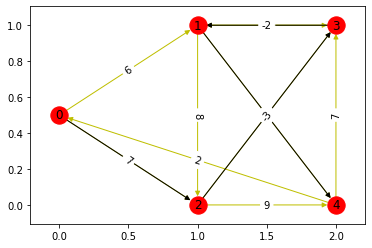

In [34]:
import networkx as nx
from networkx.algorithms.flow import shortest_augmenting_path
import matplotlib.pyplot as plt
pos = {}
G = nx.DiGraph()
for edge in e2:
    G.add_edge(edge[0],edge[1], weight=edge[2])
for i in set(G.nodes):
    if i==0:
        pos[i]=[0,0.5]
    else:
        pos[i]=[(i+1)//2,i%2]
# pos=nx.spring_layout(G)
P=nx.DiGraph()
for i in range(len(order)-1):
    P.add_edge(order[i],order[i+1])
    
# 将参数画到图上
weight = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos,node_color='r')
nx.draw_networkx_edges(G, pos,edge_color='y')
nx.draw_networkx_edges(P, pos,edge_color='k')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G,pos,weight)
plt.show()

In [35]:
import networkx as nx
G = nx.DiGraph([(0,2), (1,0),(1,2),(2,1), (2,3), (3,1),(3,2)])
try:
    nx.find_cycle(G, orientation='original')
except:
    pass

list(nx.find_cycle(G, orientation='ignore'))

[(0, 2, 'forward'), (2, 1, 'forward'), (1, 0, 'forward')]

## 约束型最短路径绘图可视化

In [36]:
import numpy as np
cwts=np.array([[[1, 3, 4], [3, 4, 1], [1, 2, 1], [2, 3, 1], [2, 4, 3]], [[1, 3, 8.0], [3, 4, 9.0], [1, 2, 5.0], [2, 3, 7.0], [2, 4, 13.0]], [[1, 3, 7.0], [3, 4, 7.0], [1, 2, 4.0], [2, 3, 5.5], [2, 4, 10.5]], [[1, 3, 6.333], [3, 4, 5.667], [1, 2, 3.333], [2, 3, 4.5], [2, 4, 8.833]], [[1, 3, 5.833], [3, 4, 4.667], [1, 2, 2.833], [2, 3, 3.75], [2, 4, 7.583]]])

D:\python\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\python\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


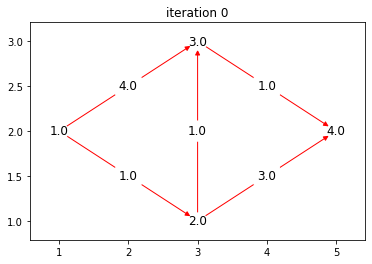

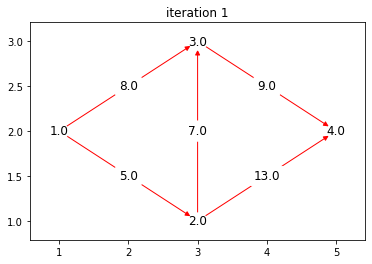

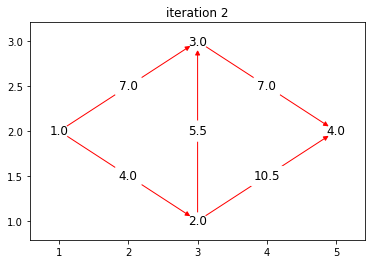

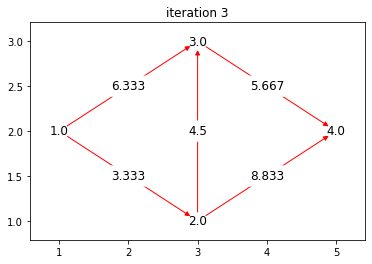

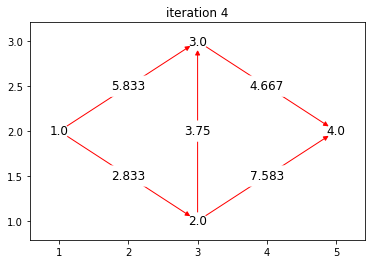

In [70]:
import networkx as nx
from networkx.algorithms.flow import shortest_augmenting_path
import matplotlib.pyplot as plt
pos = {}
pos[1]=[1,2]
pos[2]=[3,1]
pos[3]=[3,3]
pos[4]=[5,2]
i=0
for cwt in cwts:
    G = nx.DiGraph()
    for edge in cwt:
        G.add_edge(edge[0],edge[1], weight=edge[2])
  
    ## pos=nx.spring_layout(G)
    # P=nx.DiGraph()
    # for i in range(len(order)-1):
    #     P.add_edge(order[i],order[i+1])

    # 将参数画到图上
    weight = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_nodes(G, pos,node_color='w')
    nx.draw_networkx_edges(G, pos,edge_color='r')
    # nx.draw_networkx_edges(P, pos,edge_color='k')
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G,pos,weight,font_size=12,rotate=False)
    plt.title('iteration %d'%i)
    plt.show()
    i+=1

# 最小代价流

In [38]:
Edges = [[1, 2, 6, 20, 0], [1, 3, 7, 30, 25],
         [3, 2, 5, 25, 25], [4, 4, 4, 10, 0],
         [2, 4, 2, 20, 0], [2, 5, 2, 25, 25],
         [4, 5, 1, 20, 0]]
import networkx as nx
G = nx.DiGraph()
G.add_node(1, demand = -25)
G.add_node(5, demand = 25)
for edge in Edges:
    G.add_edge(edge[0],edge[1], cost=edge[2],capacity=edge[3])
flowDict = nx.min_cost_flow(G)
flowCost=nx.min_cost_flow_cost(G, demand='demand', capacity='capacity', weight='cost')

In [39]:
flowDict

{1: {2: 20, 3: 5}, 2: {4: 0, 5: 25}, 3: {2: 5}, 4: {4: 0, 5: 0}, 5: {}}

In [40]:
flowCost

230

# 剩余流

build_residual_network

In [87]:
Edges = [[1,3,2,2,0], [1,2,2,3,3],
         [2,3,3,3,1], [3,4,2,2,1],
         [2,4,3,2,2]]
import networkx as nx
G = nx.DiGraph()
G.add_node(1, demand = -3)
G.add_node(4, demand = 3)
for edge in Edges:
    G.add_edge(edge[0],edge[1], cost=edge[2],capacity=edge[3])
flowDict = nx.min_cost_flow(G)
build_residual_network(G,capacity='capacity')